In [22]:
import networkx as nx
from networkx.readwrite import json_graph
import json

In [24]:
import pandas as pd
import http_server

In [6]:
df = pd.read_csv('correlation-new.csv', index_col='cell')

In [7]:
df.head()

,Ute_PCP1,Ute_PCP2,Ute_PCP3,Ute_PCP4,Co_PCP_100_Epit,Co_PCP_200_Epit,Co_PCP_2k_FACS_1,Co_PCP_2k_FACS_3,Co_P1_FA_GFP_0,Co_P1_FA_GFP_8,...,Co_P1_Ep_GFP_37,Co_P1_Ep_tdTom_8,Co_P1_Ep_Neg_49,Co_P1_Ep_tdTom_9,Co_P1_Ep_Neg_50,Co_P1_Ep_GFP_39,Co_P1_Ep_Neg_51,Co_P1_Ep_Neg_54,Co_P1_Ep_Neg_52,Co_P1_Ep_GFP_40
cell,,,,,,,,,,,,,,,,,,,,,
Ute_PCP1,1.000000,0.932962,0.901246,0.908083,0,0.000000,0,0,0,0,...,0,0,0,0,0.000000,0,0,0,0,0
Ute_PCP2,0.932962,1.000000,0.848825,0.869365,0,0.000000,0,0,0,0,...,0,0,0,0,0.000000,0,0,0,0,0
Ute_PCP3,0.901246,0.848825,1.000000,0.980836,0,0.000000,0,0,0,0,...,0,0,0,0,0.000000,0,0,0,0,0
Ute_PCP4,0.908083,0.869365,0.980836,1.000000,0,0.000000,0,0,0,0,...,0,0,0,0,0.000000,0,0,0,0,0
Co_PCP_100_Epit,0.000000,0.000000,0.000000,0.000000,1,0.889402,0,0,0,0,...,0,0,0,0,0.835871,0,0,0,0,0


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
a = nx.from_numpy_matrix(df.as_matrix())

In [12]:
a.get_edge_data(0,1)

{'weight': 0.932961586702739}

In [13]:
name_map = {}
for i,name in enumerate(df.keys()):
    name_map[i] = name

In [14]:
a = nx.relabel_nodes(a, name_map)

In [15]:
a.remove_edges_from(a.selfloop_edges())

In [16]:
remove = [node for node,degree in a.degree().items() if degree == 0]

a.remove_nodes_from(remove)


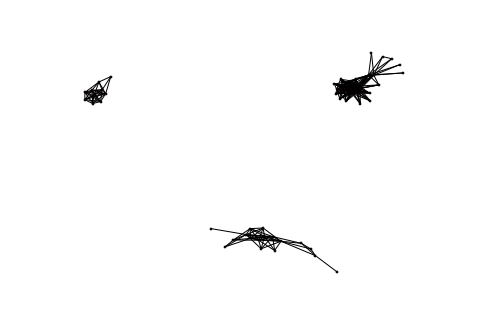

In [17]:
nx.draw(a,node_size=3)

In [19]:
for e in a.edges(data=True)[0:100]:
    print(e)

('Ute_PCP1', 'Ute_PCP3', {'weight': 0.9012458667649591})
('Ute_PCP1', 'Ute_PCP2', {'weight': 0.932961586702739})
('Ute_PCP1', 'Ute_PCP4', {'weight': 0.9080828330658629})
('Co_PCP_100_Epit', 'Co_P1_Ep_Neg_3', {'weight': 0.812989085238836})
('Co_PCP_100_Epit', 'Co_P1_Ep_Neg_39', {'weight': 0.803595863881839})
('Co_PCP_100_Epit', 'Co_P1_Ep_GFP_38', {'weight': 0.850939345767948})
('Co_PCP_100_Epit', 'Co_P1_Ep_GFP_35', {'weight': 0.855400816851529})
('Co_PCP_100_Epit', 'Co_P1_Ep_Neg_26', {'weight': 0.8327795201291941})
('Co_PCP_100_Epit', 'Co_P1_Ep_GFP_26', {'weight': 0.828062331961389})
('Co_PCP_100_Epit', 'Co_P1_Ep_Neg_50', {'weight': 0.835870929014157})
('Co_PCP_100_Epit', 'Co_P1_Ep_tdTom_2', {'weight': 0.811658056306718})
('Co_PCP_100_Epit', 'Co_PCP_200_Epit', {'weight': 0.8894018676102879})
('Co_PCP_100_Epit', 'Co_P1_Ep_Neg_30', {'weight': 0.8355651011238701})
('Co_PCP_100_Epit', 'Co_P1_Ep_Neg_48', {'weight': 0.8255516793722599})
('Ute_P1_GFP_40', 'Ute_P1_GFP_51', {'weight': 0.83643155

In [25]:
d = json_graph.node_link_data(a) # node-link format to serialize
# write json
json.dump(d, open('force/force.json','w'))
print('Wrote node-link JSON data to force/force.json')
# open URL in running web browser
http_server.load_url('force/force.html')
print('Or copy all files in force/ to webserver and load force/force.html')

Wrote node-link JSON data to force/force.json
Press <RETURN> to stop server

To restart server run: 
python -m http.server 8000
Or copy all files in force/ to webserver and load force/force.html


127.0.0.1 - - [07/Feb/2016 06:42:23] "GET /force/force.html HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:23] "GET /force/force.css HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:23] "GET /force/force.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:23] "GET /force/force.json HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:42] "GET /force/force.html HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:42] "GET /force/force.css HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:42] "GET /force/force.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:43] "GET /force/force.json HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:45] "GET /force/force.html HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:45] "GET /force/force.css HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:45] "GET /force/force.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:45] "GET /force/force.json HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2016 06:42:47] "GET /force/force.html HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb